Bu uygulamamızda Decision Tree modelini kullanacağız.
Kodumuzu fonksiyonlar kullanarak düzenli bir şekilde yazacağız ve sonrasında bu fonksiyonlarımızı çağırarak çalıştıracağız.
Decision Tree modelinin entropy ve gini parametlerini kullanarak optimize edeceğiz.
En sonunda çıkan Decision Tree mizi indireceğiz.

Dataset uzunluk:  625
Dataset boyutu:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Index([0, 1, 2, 3, 4], dtype='int64')
Value Counts:  <bound method IndexOpsMixin.value_counts of 0      B
1      R
2      R
3      R
4      R
      ..
620    L
621    L
622    L
623    L
624    B
Name: 0, Length: 625, dtype: object>
unique:  <bound method Series.unique of 0      B
1      R
2      R
3      R
4      R
      ..
620    L
621    L
622    L
623    L
624    B
Name: 0, Length: 625, dtype: object>
gini karar agaci
Results using gini index: 
Predicted values: 
['R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R'
 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R'
 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L'
 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R' 'L' 'R'
 'R

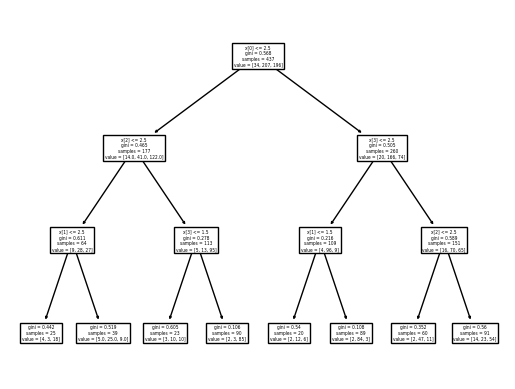

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from warnings import filterwarnings
filterwarnings('ignore')

#veri kümesini yükle
def importData():
    balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
    sep = ',', header=None)

    #veri kümesinin boyutları
    print('Dataset uzunluk: ', len(balance_data))
    print('Dataset boyutu: ', balance_data.shape)
    print('Dataset: ', balance_data.head())
    print(balance_data.columns)
    print('Value Counts: ', balance_data[0].value_counts)

    return balance_data

#veri kümesini böl
def splitDataset(balance_data):
    
    #özellik ve etiketleri ayır
    X = balance_data.values[ :, 1:5]
    y = balance_data.values[ :, 0]
    print('unique: ', balance_data[0].unique)
    #splitting dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    return X, y, X_train, X_test, y_train, y_test
    
#giniIndex'e göre eğitim yap
def train_using_gini(X_train, X_test, y_train):
    #creating the classifier object
    clf_gini = tree.DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=3, min_samples_leaf=5) #min_samples_leaf = budama işlemi

    #performing training
    clf_gini.fit(X_train, y_train)
    print('gini karar agaci')
    #agac cizdirme
    tree.plot_tree(clf_gini)    
    return clf_gini

#entropy'e göre eğitim yap
def train_using_entropy(X_train, X_test, y_train):
    #creating the classifier object
    clf_entropy = tree.DecisionTreeClassifier(criterion = "entropy", random_state=100, max_depth=3, min_samples_leaf=5)

    #performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

#function to make prediction
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print('Predicted values: ')
    print(y_pred)
    return y_pred

#function to calculate accuracy
def cal_accuracy(y_test, y_pred):
    print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
    print('Accuracy: ', accuracy_score(y_test, y_pred)*100)
    print('Report: ', classification_report(y_test, y_pred))

#calling functions
data = importData()
X, y, X_train, X_test, y_train, y_test = splitDataset(data)
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = train_using_entropy(X_train, X_test, y_train)

#operational phase
print('Results using gini index: ')
#prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)


#operational phase
print('Results using entropy index: ')
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

In [57]:
#çıkan Decision Tree tablosunu bilgisayara indirme
!pip install graphviz
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("Balance")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 603.4 kB/s eta 0:00:000:00:01


'Balance.pdf'